## Clouds - low (and high) cloud fraction and ROME - one model
LCF - Low Cloud Fraction <br>
HCF - High Cloud Fraction <br>
<br>

In [181]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import seaborn as sns

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [182]:
def plot_snapshot(var, variable_name, cmap):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(20, 10))
    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, ' + model + ', ' + experiment)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [183]:
def plot_timeseries(y, variable_name, series_type):
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.axhline(y=y.mean(dim='time'), color='k')
    plt.title(variable_name + ', '+ series_type + ', ' + model + ', ' + experiment)
    plt.ylabel(variable_name + ' ['+y.units+']')
    plt.xlabel(series_type)

In [184]:
def plot_scatter(x,y,scatter_type):
    f, ax = plt.subplots(figsize = (12.5,8))
    res= stats.pearsonr(x,y)

    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.ylabel(cloud_option + ' [' + y.units +']')
    plt.xlabel(org_option + ' ['+ x.units +']')
    title = cloud_option + ' and ' + org_option + ', ' + scatter_type + ', ' + model + ', ' + experiment

    if res[1]<=0.05:
        plt.title(title + ', R$^2$ = '+ str(round(res[0]**2,3)) + ', r=' + str(round(res[0],3)))
    else:
        plt.title(title + ', not statistically significant')

In [185]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments=[
    'historical', 
    # 'rcp85'
    ]
experiment = experiments[0]


org_options = [
    'rome',
    # 'rome_n',
    # 'o_number'
    ]
org_option = org_options[0]


cloud_options = [
    'cloud_low'
    # 'cloud_high'
    ]
cloud_option = cloud_options[0]

if org_option == 'rome' or org_option == 'rome_n':
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    org = ds[org_option]

if org_option == 'o_number':
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    org = ds[org_option]


folder = home + '/Documents/data/cmip5/ds'
fileName = model + '_cl_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
clouds = ds[cloud_option]
clouds.attrs['units']='%'

aWeights = np.cos(np.deg2rad(clouds.lat))

### examples of hig and low cloud scene

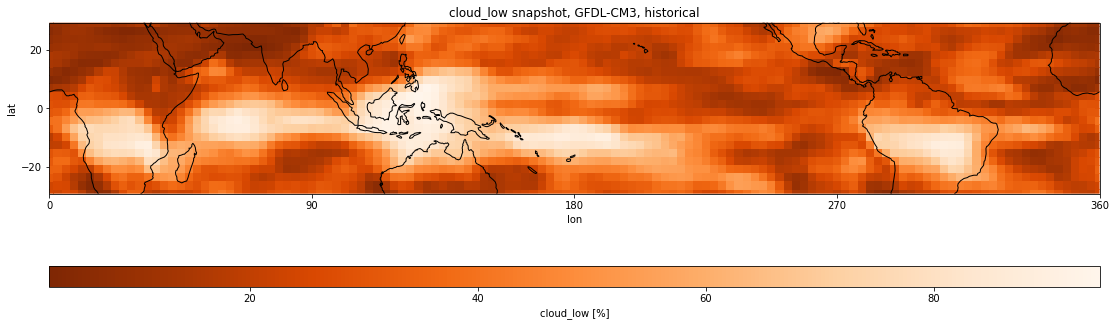

In [186]:
var = clouds.isel(time=0)
variable_name = cloud_option
cmap = 'Oranges_r'

plot_snapshot(var, variable_name, cmap)

### individual time series

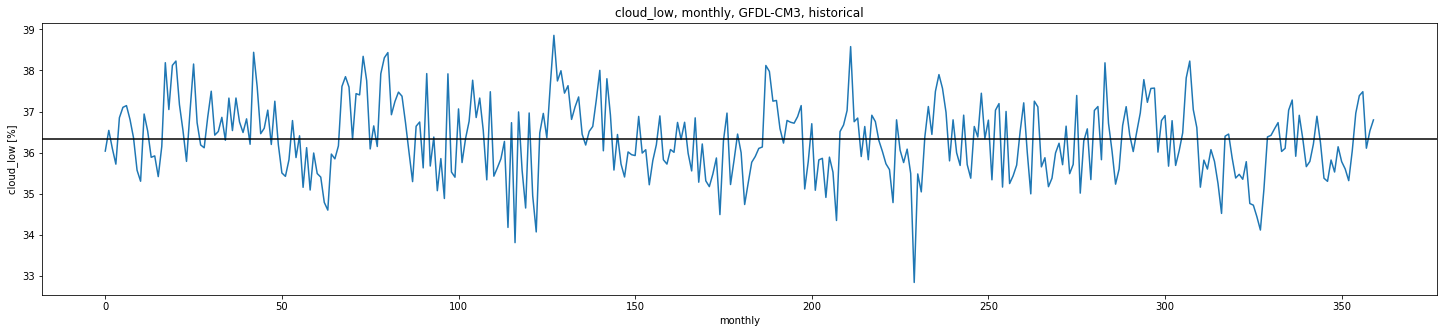

In [187]:
y = clouds.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)
variable_name = cloud_option
series_type = 'monthly'

plot_timeseries(y, variable_name, series_type)

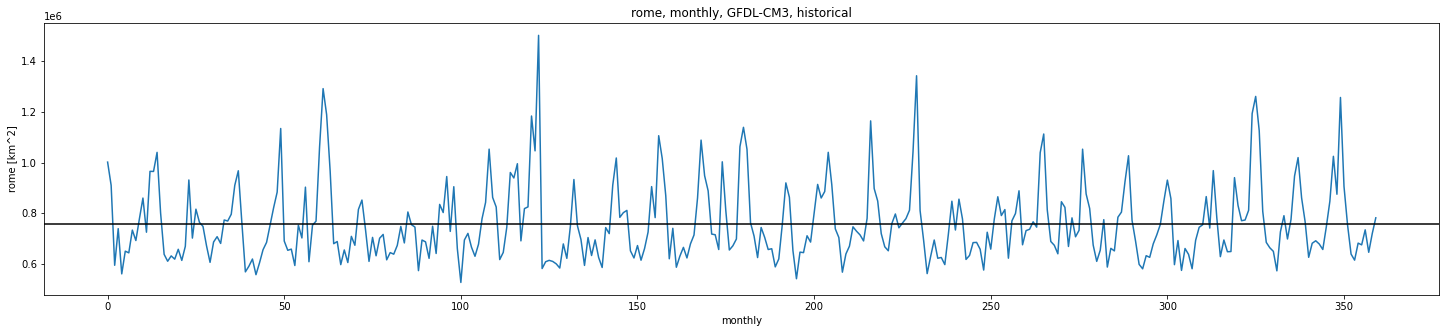

In [188]:
y = org.resample(time='M').mean(dim='time', keep_attrs=True)
variable_name = org_option
series_type = 'monthly'

plot_timeseries(y, variable_name, series_type)

## Correlations

### monthly

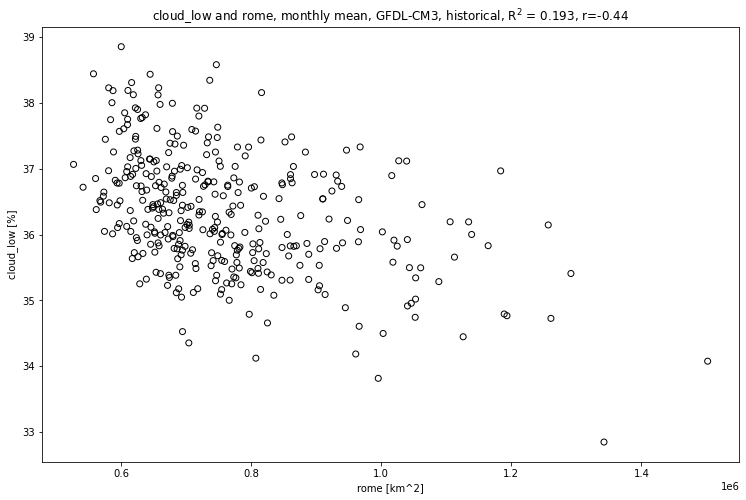

In [189]:
x = org.resample(time='M').mean(dim='time', keep_attrs=True)
y = clouds.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)
scatter_type = 'monthly mean'

plot_scatter(x,y,scatter_type)